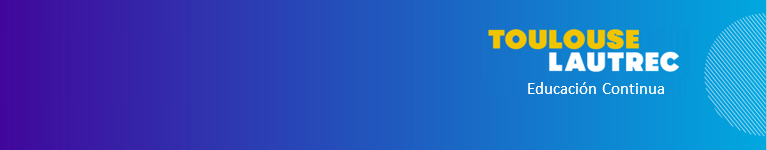

#**APRENDIZAJE AUTOMÁTICO**



----------------------------
**SESIÓN N°4:** Análisis Factorial Exploratorio

Docente: Luis Bautista



<a id="1"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>1.Importando Libreria</b></h2>

In [9]:
# Manipulación y Tratamiento de Datos
import numpy as np
import pandas as pd

# Visualización de los Datos
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


<a id="2"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>2.Cargando Datos</b></h2>

In [10]:
df=pd.read_csv("wine_data.csv")
df.head()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
df=df.drop("class_label",axis=1)

In [15]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<a id="3"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>3.Evaluación de la Factibilidad del AFE</b></h2>

**Test KMO**
La medida de adecuación de KMO nos dice que tan viable es aplicar un modelo de análisis factorial sobre nuestro datos, donde con un valor menor a 0.6 no tendríamos buenos resultados.

In [7]:
!pip install factor_analyzer

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [11]:
import pandas as pd
from factor_analyzer import calculate_kmo

In [16]:
msa, kmo  = calculate_kmo(df)

print(f'La adecuación del modelo es de {kmo}. Lo que nos da una adecuación según la escala kmo Adecuado\n')

for idx, column in enumerate(df.columns):
    print(f'MSA para el factor {column}:', round(msa[idx], 3))

La adecuación del modelo es de 0.7786821205606519. Lo que nos da una adecuación según la escala kmo Adecuado

MSA para el factor alcohol: 0.728
MSA para el factor malic_acid: 0.799
MSA para el factor ash: 0.436
MSA para el factor alcalinity_of_ash: 0.683
MSA para el factor magnesium: 0.683
MSA para el factor total_phenols: 0.873
MSA para el factor flavanoids: 0.814
MSA para el factor nonflavanoid_phenols: 0.825
MSA para el factor proanthocyanins: 0.855
MSA para el factor color_intensity: 0.617
MSA para el factor hue: 0.788
MSA para el factor OD280/OD315_of_diluted_wines: 0.868
MSA para el factor proline: 0.819


<a id="4"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>4.Número de factores</b></h2>

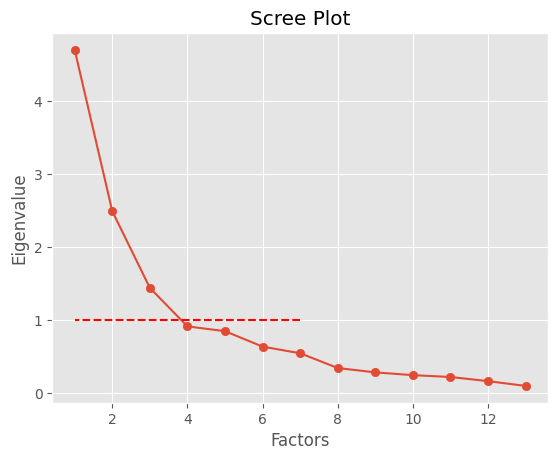

In [18]:
# Aplicamos el AFE con el mismo números de variables que de factores (7)
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(7, rotation=None)
fa.fit(df)

# Se estraen de la solución los autovalores y autovectores
ev, v = fa.get_eigenvalues()

# Graficamos la solución
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.hlines(y = 1, xmax=1, xmin=7, color='r', linestyles='--')
plt.show()

<a id="5"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>5.Análisis factorial exploratorio</b></h2>

In [19]:
# APlicamos el modelo con 3 factores, con una rotación ortogonal y usando el método de Ejes Principales
fa = FactorAnalyzer(3, rotation='varimax', method='principal', use_smc=True)
fa.fit(df)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=df.columns)
communalities = pd.DataFrame(fa.get_communalities().reshape(-1, 1), columns=['Communalities'], index=df.columns)
loadings = loadings.join(communalities)

variance = pd.DataFrame(fa.get_factor_variance(), columns=['Factor 1', 'Factor 2', 'Factor 3'], index=['variance', 'proportional_variance', 'cumulative_variances'])

In [21]:
#Varianza
variance

,Factor 1,Factor 2,Factor 3
variance,4.343133,2.671143,1.63462
proportional_variance,0.334087,0.205473,0.12574
cumulative_variances,0.334087,0.539560,0.66530


In [22]:
#Cargas
loadings

,Factor 1,Factor 2,Factor 3,Communalities
alcohol,0.030504,0.856736,-0.096863,0.744309
malic_acid,-0.559342,0.144769,0.294736,0.420691
ash,0.061119,0.317913,0.843652,0.816553
alcalinity_of_ash,-0.289650,-0.319153,0.791080,0.811564
magnesium,0.205392,0.505987,0.213477,0.343782
total_phenols,0.816120,0.327787,0.030590,0.774433
flavanoids,0.902477,0.245220,-0.004028,0.874613
nonflavanoid_phenols,-0.562081,-0.198553,0.328750,0.463436
proanthocyanins,0.663500,0.234406,0.057203,0.498451
color_intensity,-0.437278,0.751537,0.097906,0.765606
